### Import necessary libraryies

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 710kB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76240 sha256=60a9331215a6acbc6ab919c6c7a5abdca555ba92651f9923ed34c0d2c8b3fc1e
  Stored in directory: /Users/justinwu/Library/Caches/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
Folium installed
Libraries imported.


### Foursqure setting

In [282]:
CLIENT_ID = 'FGF1SK2HYOHKUIPSVAKXSEPTVYRRS3FMS4OE4WTWKDDYSHTE' # your Foursquare ID
CLIENT_SECRET = '1FDO4E41CFGZBFYRKGE1TOXR2NM5DD0MIFNCC2GY5RHH5SS4' # your Foursquare Secret
ACCESS_TOKEN = 'UYPUGMAYB2TFJACUJN3BAM5ERGZZUHW3B1NQTH0LL12K2RN2' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FGF1SK2HYOHKUIPSVAKXSEPTVYRRS3FMS4OE4WTWKDDYSHTE
CLIENT_SECRET:1FDO4E41CFGZBFYRKGE1TOXR2NM5DD0MIFNCC2GY5RHH5SS4


In [456]:
Taipei_districts_name = ["Wanhua district taipei", "Datong district taipei", "Zhongzheng district taipei", 
                         "Daan district taipei", "Xinyi district taipei", "Zhongshan district taipei",
                         "Songshan district taipei", "Beitou district taipei", "Shilin district taipei",
                         "Neihu district taipei", "Nangang district taipei", "Wenshan district taipei"]

Taipei_district_df = pd.DataFrame(columns=["District", "lat", "lng"])

for district in Taipei_districts_name :
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(district)
    latitude = location.latitude
    longitude = location.longitude
    District_name = district.split()[0]
    #print(District_name, latitude, longitude)
    
    df2 = {'District' : District_name, 'lat' : latitude, 'lng': longitude}
    
    Taipei_district_df = Taipei_district_df.append(df2, ignore_index=True)

In [457]:
Taipei_district_df

,District,lat,lng
0,Wanhua,25.031933,121.499332
1,Datong,25.065986,121.515514
2,Zhongzheng,25.032361,121.518267
3,Daan,25.026515,121.534395
4,Xinyi,25.033345,121.566896
5,Zhongshan,25.064361,121.533468
6,Songshan,25.049885,121.577272
7,Beitou,25.131931,121.498593
8,Shilin,25.091840,121.524207
9,Neihu,25.069664,121.588998


In [431]:
BubbleTeaShop_ID= '52e81612bcbc57f1066b7a0c'

radius = 1000

BubbleTeaShop_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, BubbleTeaShop_ID, radius, LIMIT)
College_Univerisy_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, College_University_ID, radius, LIMIT)

def json_parser(url):
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    
    dataframe = dataframe[['name', 'location.lat', 'location.lng']]
    dataframe.columns = ['name', 'lat', 'lng']
    
    return dataframe

### Bubble tea shops distribution over 12 Taipei districts

Text(0.5, 1.0, 'Bubble tea shops distribution over 12 districts')

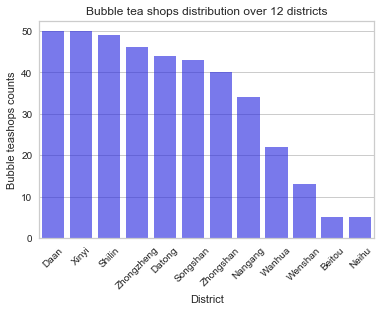

In [449]:
BubbleTeaShop_df = json_parser(BubbleTeaShop_url)
BubbleTeaShop_df.shape[0]

bubble_count=[]

for district, lat, lng in zip(Taipei_district_df['District'], Taipei_district_df['lat'], Taipei_district_df['lng']):
    
    url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, BubbleTeaShop_ID, radius, LIMIT)
    #url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, BubbleTeaShop_ID, radius, LIMIT)
    #print(district, lat, lng)
    
    parser_result_df = json_parser(url)
    bubble_tea_shop_count = parser_result_df.shape[0]
    
    #Taipei_district_df.loc[i, ['Bubble_tea_amount']]=bubble_tea_shop_count
    
    bubble_count.append(bubble_tea_shop_count)

Taipei_district_df['bubble_teashop_counts'] = bubble_count

import seaborn as sns
import matplotlib.pyplot as plt

pd_df = Taipei_district_df.sort_values(['bubble_teashop_counts'], ascending=False).reset_index(drop=True)


sns.barplot(x = 'District', y = 'bubble_teashop_counts', color ='blue', alpha=0.6, data = pd_df)

plt.ylabel("Bubble teashops counts")
plt.xticks(rotation=45)
plt.title("Bubble tea shops distribution over 12 districts")


### College, School, cafe density

In [459]:
Taipei_district_df['College_counts'] = ""
Taipei_district_df['School_counts']  = ""
Taipei_district_df['Bus_stop_counts']= ""
Taipei_district_df['Hotel_counts']   = ""
Taipei_district_df['Metro_counts']   = ""




Taipei_district_df

,District,lat,lng,College_counts,School_counts,Bus_stop_counts,Hotel_counts,Metro_counts
0,Wanhua,25.031933,121.499332,,,,,
1,Datong,25.065986,121.515514,,,,,
2,Zhongzheng,25.032361,121.518267,,,,,
3,Daan,25.026515,121.534395,,,,,
4,Xinyi,25.033345,121.566896,,,,,
5,Zhongshan,25.064361,121.533468,,,,,
6,Songshan,25.049885,121.577272,,,,,
7,Beitou,25.131931,121.498593,,,,,
8,Shilin,25.091840,121.524207,,,,,
9,Neihu,25.069664,121.588998,,,,,


In [465]:
College_ID = '4d4b7105d754a06372d81259'
School_ID  = '4bf58dd8d48988d13b941735'
Bus_stop_ID= '52f2ab2ebcbc57f1066b8b4f'
Hotel_ID   = '4bf58dd8d48988d1fa931735'
Metro_ID  = '4bf58dd8d48988d1fd931735'

feature_list=[College_ID, School_ID, Bus_stop_ID, Hotel_ID, Metro_ID]


for feature in feature_list:
    
    
    temp_count=[]
    
    
    
    for district, lat, lng in zip(Taipei_district_df['District'], Taipei_district_df['lat'], Taipei_district_df['lng']):
    
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, feature, radius, LIMIT)

        #print(district, lat, lng)

        parser_result_df = json_parser(url)
        feature_count = parser_result_df.shape[0]

        i = 0
        j = 3


        Taipei_district_df.iloc[i, j]= feature_count

        i+=1
        
    j+=1
    
        #bubble_count.append(bubble_tea_shop_count)
    








In [466]:
Taipei_district_df

,District,lat,lng,College_counts,School_counts,Bus_stop_counts,Hotel_counts,Metro_counts
0,Wanhua,25.031933,121.499332,2,,,,
1,Datong,25.065986,121.515514,,,,,
2,Zhongzheng,25.032361,121.518267,,,,,
3,Daan,25.026515,121.534395,,,,,
4,Xinyi,25.033345,121.566896,,,,,
5,Zhongshan,25.064361,121.533468,,,,,
6,Songshan,25.049885,121.577272,,,,,
7,Beitou,25.131931,121.498593,,,,,
8,Shilin,25.091840,121.524207,,,,,
9,Neihu,25.069664,121.588998,,,,,


In [362]:
Taipei_City = geolocator.geocode("Taipei City")
latitude = location.latitude
longitude = location.longitude

Taipei_district_map = folium.Map(location=[Taipei_City.latitude, Taipei_City.longitude], zoom_start=13)

for lat, lng, label in zip(Taipei_district_df.lat, Taipei_district_df.lng, Taipei_district_df.District):
    folium.Circle(
        [lat, lng],
        radius=1000,
        color='orange',
        popup=label,
        fill=True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(Taipei_district_map
            )

for lat, lng, label in zip(BubbleTeaShop_df.lat, BubbleTeaShop_df.lng, BubbleTeaShop_df.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Taipei_district_map
            )
    
Taipei_district_map

In [218]:
column_selected = ['name', 'lat', 'lng', 'categories']
Taipei_school = Taipei_school.loc[:,column_selected].reset_index(drop=True)
Taipei_school.head()

,name,lat,lng,categories
0,臺北市立忠孝國民中學 Taipei Municipal ZhongXiao Junior H...,25.051248,121.507985,Middle School
1,ChengYuan High School (成淵高級中學),25.061129,121.519132,High School
2,臺北市立東門國民小學 Taipei Municipal DongMen Elementary...,25.037744,121.520599,Elementary School
3,臺北市立第一女子高級中學 Taipei First Girls High School,25.038775,121.512982,High School
4,臺北市立建成國民中學 Taipei Municipal JianCheng Junior H...,25.051614,121.519529,Middle School


In [366]:
# Search for venues with high schools' locations

def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [368]:
Taipei_district_venue = getNearbyVenues(names = Taipei_district_df['District'],
                                   latitudes=Taipei_district_df['lat'],
                                   longitudes=Taipei_district_df['lng'])

Wanhua
Datong
Zhongzheng
Daan
Xinyi
Zhongshan
Songshan
Beitou
Shilin
Neihu
Nangang
Wenshan


In [369]:
print(Taipei_district_venue.shape)
Taipei_district_venue

(880, 7)


,name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wanhua,25.031933,121.499332,Starbucks Coffee (星巴克（萬華林宅）),25.033512,121.498372,Coffee Shop
1,Wanhua,25.031933,121.499332,陳記專業腸蚵麵線,25.035152,121.498286,Taiwanese Restaurant
2,Wanhua,25.031933,121.499332,福州元祖胡椒餅,25.035485,121.500626,Snack Place
3,Wanhua,25.031933,121.499332,Longshan Temple (龍山寺),25.036956,121.499916,Buddhist Temple
4,Wanhua,25.031933,121.499332,萬大碳烤燒餅店 蟹殼黃、三角餅、胡椒餅,25.029507,121.500579,Bakery
...,...,...,...,...,...,...,...
875,Wenshan,24.989786,121.570458,公車貓纜動物園站,24.996290,121.576358,Bus Station
876,Wenshan,24.989786,121.570458,渣男 Taiwan Bistro《木柵二渣》,24.998257,121.570763,Sake Bar
877,Wenshan,24.989786,121.570458,公車捷運木柵站 MRT Muzha Sta. Bus Stop,24.997731,121.574055,Bus Station
878,Wenshan,24.989786,121.570458,里米特三明治,24.997818,121.574023,Sandwich Place


In [370]:
Taipei_district_venue.groupby('name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
name,,,,,,
Beitou,57,57,57,57,57,57
Daan,100,100,100,100,100,100
Datong,98,98,98,98,98,98
Nangang,53,53,53,53,53,53
Neihu,25,25,25,25,25,25
Shilin,74,74,74,74,74,74
Songshan,62,62,62,62,62,62
Wanhua,70,70,70,70,70,70
Wenshan,41,41,41,41,41,41


In [374]:
# one hot encoding 
Taipei_district_venue_onehot = pd.get_dummies(Taipei_district_venue[['Venue Category']], prefix="", prefix_sep="")

Taipei_district_venue_onehot['name'] = Taipei_district_venue['name']

Fixed_column = [Taipei_district_venue_onehot.columns[-1]] + list(Taipei_district_venue_onehot.columns[:-1])
Taipei_district_venue_onehot = Taipei_district_venue_onehot[Fixed_column]

Taipei_district_venue_onehot

Taipei_district_grouped = Taipei_district_venue_onehot.groupby('name').mean().reset_index()

Taipei_district_grouped

,name,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Xinjiang Restaurant
0,Beitou,0.017544,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.017544,0.000000,0.00,0.00
1,Daan,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.030000,...,0.000000,0.00,0.010000,0.00,0.000000,0.000000,0.030000,0.000000,0.00,0.01
2,Datong,0.000000,0.000000,0.010204,0.010204,0.00,0.030612,0.000000,0.010204,0.010204,...,0.000000,0.00,0.010204,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
3,Nangang,0.000000,0.000000,0.000000,0.000000,0.00,0.018868,0.037736,0.000000,0.018868,...,0.056604,0.00,0.000000,0.00,0.037736,0.000000,0.000000,0.000000,0.00,0.00
4,Neihu,0.000000,0.000000,0.000000,0.000000,0.00,0.080000,0.040000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.00,0.00
5,Shilin,0.000000,0.013514,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.013514,0.00,0.00
6,Songshan,0.000000,0.000000,0.000000,0.000000,0.00,0.048387,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.016129,0.016129,0.000000,0.000000,0.00,0.00
7,Wanhua,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.028571,...,0.000000,0.00,0.000000,0.00,0.014286,0.000000,0.000000,0.000000,0.00,0.00
8,Wenshan,0.000000,0.000000,0.000000,0.000000,0.00,0.024390,0.024390,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00
9,Xinyi,0.020000,0.000000,0.000000,0.000000,0.00,0.020000,0.010000,0.000000,0.010000,...,0.000000,0.00,0.020000,0.01,0.000000,0.000000,0.030000,0.000000,0.00,0.00


In [376]:
num_top_venues = 5

for district in Taipei_district_grouped['name']:
    print("----"+district+"----")
    temp = Taipei_district_grouped[Taipei_district_grouped['name'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beitou----
                venue  freq
0               Hotel  0.14
1   Convenience Store  0.11
2        Noodle House  0.09
3         Coffee Shop  0.07
4  Chinese Restaurant  0.05


----Daan----
                  venue  freq
0                  Café  0.19
1  Taiwanese Restaurant  0.07
2           Coffee Shop  0.06
3              Tea Room  0.05
4   Dumpling Restaurant  0.04


----Datong----
                  venue  freq
0  Taiwanese Restaurant  0.11
1     Convenience Store  0.08
2          Dessert Shop  0.08
3                  Café  0.05
4           Coffee Shop  0.04


----Nangang----
                  venue  freq
0           Coffee Shop  0.13
1   Japanese Restaurant  0.11
2     Convenience Store  0.08
3       Thai Restaurant  0.06
4  Fast Food Restaurant  0.06


----Neihu----
                venue  freq
0   Convenience Store  0.24
1  Chinese Restaurant  0.08
2    Asian Restaurant  0.08
3      Breakfast Spot  0.04
4      Tennis Stadium  0.04


----Shilin----
                 venue  fr

In [377]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [380]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['name'] = Taipei_district_grouped['name']

for ind in np.arange(Taipei_district_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Taipei_district_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted

,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beitou,Hotel,Convenience Store,Noodle House,Coffee Shop,Asian Restaurant,Park,Café,Chinese Restaurant,Museum,Dessert Shop
1,Daan,Café,Taiwanese Restaurant,Coffee Shop,Tea Room,Dumpling Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Noodle House,Bakery
2,Datong,Taiwanese Restaurant,Convenience Store,Dessert Shop,Café,Coffee Shop,Hotel,Noodle House,Park,Asian Restaurant,Chinese Restaurant
3,Nangang,Coffee Shop,Japanese Restaurant,Convenience Store,Thai Restaurant,Fast Food Restaurant,Hotel,Train Station,BBQ Joint,Hotpot Restaurant,Korean Restaurant
4,Neihu,Convenience Store,Chinese Restaurant,Asian Restaurant,Taiwanese Restaurant,Cafeteria,Sporting Goods Shop,Breakfast Spot,Golf Course,Coffee Shop,Gym / Fitness Center
5,Shilin,Convenience Store,Café,Ice Cream Shop,Hotel,Breakfast Spot,Noodle House,Japanese Restaurant,Taiwanese Restaurant,Food Truck,Tea Room
6,Songshan,Convenience Store,Chinese Restaurant,Park,Taiwanese Restaurant,Hotpot Restaurant,Asian Restaurant,Hotel,Seafood Restaurant,Japanese Restaurant,Bus Station
7,Wanhua,Taiwanese Restaurant,Convenience Store,Chinese Restaurant,Night Market,Dessert Shop,Coffee Shop,Dumpling Restaurant,Hostel,Bakery,Food Truck
8,Wenshan,Convenience Store,Coffee Shop,Café,Bus Station,Japanese Restaurant,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Malay Restaurant,Playground
9,Xinyi,Department Store,Café,Hotel,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Steakhouse,Bar


## Cluster Analysis

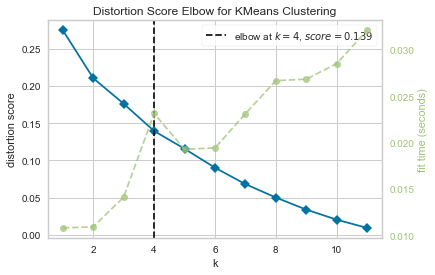

In [396]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer




Taipei_district_clusering = Taipei_district_grouped.drop('name', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(Taipei_district_clusering)
visualizer.show()

In [397]:
# set number of clusters
kclusters = 4

# run k-means clustering with number of cluster decided by elbow method
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Taipei_district_clusering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 3, 0, 3, 0, 2, 3, 3], dtype=int32)

In [387]:
District_venues_sorted.insert(0, 'Clusterlabel', kmeans.labels_)


In [388]:
District_venues_sorted

,Clusterlabel,name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Beitou,Hotel,Convenience Store,Noodle House,Coffee Shop,Asian Restaurant,Park,Café,Chinese Restaurant,Museum,Dessert Shop
1,1,Daan,Café,Taiwanese Restaurant,Coffee Shop,Tea Room,Dumpling Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Noodle House,Bakery
2,2,Datong,Taiwanese Restaurant,Convenience Store,Dessert Shop,Café,Coffee Shop,Hotel,Noodle House,Park,Asian Restaurant,Chinese Restaurant
3,3,Nangang,Coffee Shop,Japanese Restaurant,Convenience Store,Thai Restaurant,Fast Food Restaurant,Hotel,Train Station,BBQ Joint,Hotpot Restaurant,Korean Restaurant
4,0,Neihu,Convenience Store,Chinese Restaurant,Asian Restaurant,Taiwanese Restaurant,Cafeteria,Sporting Goods Shop,Breakfast Spot,Golf Course,Coffee Shop,Gym / Fitness Center
5,3,Shilin,Convenience Store,Café,Ice Cream Shop,Hotel,Breakfast Spot,Noodle House,Japanese Restaurant,Taiwanese Restaurant,Food Truck,Tea Room
6,0,Songshan,Convenience Store,Chinese Restaurant,Park,Taiwanese Restaurant,Hotpot Restaurant,Asian Restaurant,Hotel,Seafood Restaurant,Japanese Restaurant,Bus Station
7,2,Wanhua,Taiwanese Restaurant,Convenience Store,Chinese Restaurant,Night Market,Dessert Shop,Coffee Shop,Dumpling Restaurant,Hostel,Bakery,Food Truck
8,3,Wenshan,Convenience Store,Coffee Shop,Café,Bus Station,Japanese Restaurant,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Malay Restaurant,Playground
9,3,Xinyi,Department Store,Café,Hotel,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Steakhouse,Bar


In [395]:
Taipei_district_merge = Taipei_district_df
Taipei_district_merge.columns = ['name', 'latitude', 'longitude']
Taipei_district_merge.head()

Taipei_district_merge = Taipei_district_merge.join(District_venues_sorted.set_index('name'), on='name')
Taipei_district_merge.head()

,name,latitude,longitude,Clusterlabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wanhua,25.031933,121.499332,2,Taiwanese Restaurant,Convenience Store,Chinese Restaurant,Night Market,Dessert Shop,Coffee Shop,Dumpling Restaurant,Hostel,Bakery,Food Truck
1,Datong,25.065986,121.515514,2,Taiwanese Restaurant,Convenience Store,Dessert Shop,Café,Coffee Shop,Hotel,Noodle House,Park,Asian Restaurant,Chinese Restaurant
2,Zhongzheng,25.032361,121.518267,3,Café,Noodle House,Convenience Store,Breakfast Spot,Japanese Restaurant,Dumpling Restaurant,Coffee Shop,Taiwanese Restaurant,History Museum,Hotpot Restaurant
3,Daan,25.026515,121.534395,1,Café,Taiwanese Restaurant,Coffee Shop,Tea Room,Dumpling Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Noodle House,Bakery
4,Xinyi,25.033345,121.566896,3,Department Store,Café,Hotel,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Steakhouse,Bar


In [400]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Taipei_district_merge['latitude'], Taipei_district_merge['longitude'], Taipei_district_merge['name'], Taipei_district_merge['Clusterlabel']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1 :

In [225]:
Taipei_school_merge.loc[Taipei_school_merge['Clusterlabel'] == 0, Taipei_school_merge.columns[[0,3] + list(range(4, Taipei_school_merge.shape[1]))]]

,School,Categories,Clusterlabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,臺北市立忠孝國民中學 Taipei Municipal ZhongXiao Junior H...,Middle School,0,Noodle House,Café,Taiwanese Restaurant,Hotel,Convenience Store,Gym / Fitness Center,Coffee Shop,Furniture / Home Store,Fabric Shop,Dessert Shop
1,ChengYuan High School (成淵高級中學),High School,0,Dessert Shop,Japanese Restaurant,Taiwanese Restaurant,Coffee Shop,Convenience Store,Dumpling Restaurant,Laser Tag,Fast Food Restaurant,Market,Soup Place
3,臺北市立第一女子高級中學 Taipei First Girls High School,High School,0,Chinese Restaurant,Convenience Store,Park,Noodle House,Café,Hostel,Museum,Bike Rental / Bike Share,Coffee Shop,Bubble Tea Shop
11,台北市立萬華國民中學 Taipei Municipal WanHua Junior High...,Middle School,0,Convenience Store,Coffee Shop,Supermarket,Hotel,Bakery,Chinese Restaurant,Yunnan Restaurant,Fast Food Restaurant,Food Truck,Food Stand
14,臺北市立蘭州國民中學 Taipei Municipal LanZhou Junior Hig...,Middle School,0,Convenience Store,Café,Asian Restaurant,Taiwanese Restaurant,Noodle House,Coffee Shop,Hotel,Japanese Restaurant,Gym / Fitness Center,Metro Station
15,臺北市立中山女子高級中學 Taipei Municipal Zhongshan Girls'...,High School,0,Convenience Store,Chinese Restaurant,Hotel,Japanese Restaurant,Café,Hotpot Restaurant,Coffee Shop,Dessert Shop,Noodle House,Restaurant
16,台北市立古亭國民中學 Taipei Municipal GuTing Junior High...,Middle School,0,Convenience Store,Dessert Shop,Japanese Restaurant,Food Truck,Market,Fast Food Restaurant,French Restaurant,Food Stand,Food Court,Food & Drink Shop
17,臺北市立幸安國民小學 Taipei Municipal XingAn Elementary ...,Elementary School,0,Chinese Restaurant,Hotel,Café,Dumpling Restaurant,Flea Market,Asian Restaurant,Convenience Store,Metro Station,Coffee Shop,Noodle House
20,Taipei Municipal ZhongShan Elementary School (...,Elementary School,0,Japanese Restaurant,Convenience Store,Chinese Restaurant,Taiwanese Restaurant,Hotel,Fast Food Restaurant,Hotpot Restaurant,Bar,Café,Supermarket
21,Taipei Municipal JiLin Elementary School (臺北市立...,Elementary School,0,Convenience Store,Taiwanese Restaurant,Chinese Restaurant,Hotpot Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Noodle House,Hotel,Coffee Shop,Japanese Restaurant


### Cluster2 :

In [226]:
Taipei_school_merge.loc[Taipei_school_merge['Clusterlabel'] == 1, Taipei_school_merge.columns[[0,3] + list(range(4, Taipei_school_merge.shape[1]))]]

,School,Categories,Clusterlabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,臺北市立東門國民小學 Taipei Municipal DongMen Elementary...,Elementary School,1,Food Court,Theater,Monument / Landmark,Concert Hall,Café,Breakfast Spot,Dumpling Restaurant,Sculpture Garden,Tea Room,Juice Bar
4,臺北市立建成國民中學 Taipei Municipal JianCheng Junior H...,Middle School,1,Coffee Shop,Hotel,Ramen Restaurant,Train Station,Chinese Restaurant,Department Store,Bakery,Japanese Restaurant,Gourmet Shop,Gym
5,臺北市立南門國民中學 Taipei Municipal NanMen Junior High...,Middle School,1,Café,Noodle House,Hotel,Coffee Shop,History Museum,Chinese Restaurant,Metro Station,Supermarket,Historic Site,Convenience Store
6,臺北市立弘道國民中學 Taipei Municipal HongDao Junior Hig...,Middle School,1,Park,Food Court,Museum,Concert Hall,Bar,Fast Food Restaurant,Coffee Shop,Bistro,Sandwich Place,Bike Rental / Bike Share
7,臺北市立成功高級中學 Taipei Municipal ChengGong High School,High School,1,Dumpling Restaurant,Café,Noodle House,Chinese Restaurant,Hotel,Fast Food Restaurant,Thai Restaurant,Farmers Market,Coffee Shop,Historic Site
8,臺北市立福星國民小學 Taipei Municipal FuXing Elementary ...,Elementary School,1,Clothing Store,Hotel,Asian Restaurant,Noodle House,Bubble Tea Shop,Taiwanese Restaurant,Coffee Shop,Record Shop,Hotpot Restaurant,Historic Site
9,臺北市立建國高級中學 Taipei Municipal JianGuo High School,High School,1,Japanese Restaurant,History Museum,Noodle House,Garden,Museum,Convenience Store,Theater,Fast Food Restaurant,Chinese Breakfast Place,Buffet
10,臺北市立中正國民中學 Taipei Municipal ZhongZheng Junior ...,Middle School,1,Café,Breakfast Spot,Dumpling Restaurant,Noodle House,Bakery,Convenience Store,Korean Restaurant,Plaza,Coffee Shop,Chinese Breakfast Place
18,臺北市立長安國民中學 Taipei Municipal ChangAn Junior Hig...,Middle School,1,Japanese Restaurant,Café,Taiwanese Restaurant,Hotpot Restaurant,Hotel,Seafood Restaurant,Sushi Restaurant,Ramen Restaurant,Spa,Pastry Shop
19,臺北市立河堤國民小學 Taipei Municipal Heti Elementary Sc...,Elementary School,1,Café,Japanese Restaurant,Park,Chinese Restaurant,Convenience Store,Coffee Shop,Noodle House,Vegetarian / Vegan Restaurant,Taiwanese Restaurant,Hotpot Restaurant


### Cluster3 :

In [227]:
Taipei_school_merge.loc[Taipei_school_merge['Clusterlabel'] == 2, Taipei_school_merge.columns[[0,3] + list(range(4, Taipei_school_merge.shape[1]))]]

,School,Categories,Clusterlabel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,臺北市立民權國民中學 Taipei Municipal MingQuan Junior Hi...,Middle School,2,Taiwanese Restaurant,Convenience Store,Coffee Shop,Hotel,Bakery,Noodle House,Night Market,Gym / Fitness Center,Tea Room,Bus Station
13,臺北市立大橋國民小學 Taipei Municipal Dachiao Elementary...,Elementary School,2,Taiwanese Restaurant,Convenience Store,Noodle House,Food Truck,Bus Station,Dessert Shop,Snack Place,Night Market,Grocery Store,Tea Room
36,私立南山高級中學（附設國中部） Nanshan Private School,High School,2,Breakfast Spot,Arcade,Japanese Restaurant,Taiwanese Restaurant,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court
